# Problem 1

## Part a

In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [28]:
x = np.loadtxt('../data/Ising2D_config_L30.dat.gz')
y = np.loadtxt('../data/Ising2D_labels_L30.dat')
Tval = np.loadtxt('../data/Ising2D_temps_L30.dat')

In [70]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

In [71]:
def make_one_hot(y_initial):
    y_hot = []
    for y in y_initial:
        if (y==1):
            y_hot.append([0, 1])
        else:
            y_hot.append([1,0])
    y_hot = np.array(y_hot)
    return y_hot

In [72]:
y_train_hot = make_one_hot(y_train)
y_test_hot = make_one_hot(y_test)
y_val_hot = make_one_hot(y_val)

## Part b

In [73]:
model = keras.Sequential(
[
    layers.Dense(100,input_shape=( len(x[0]), ),activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 100)               90100     
_________________________________________________________________
dense_39 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 202       
Total params: 120,602
Trainable params: 120,602
Non-trainable params: 0
________________________________________________

In [74]:
batch_size = 32
epochs = 30

training = {}
training = model.fit(x_train,y_train_hot, epochs=epochs,validation_data=(x_test,y_test_hot), verbose=2)

Epoch 1/30
400/400 - 2s - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0703 - val_accuracy: 0.9794
Epoch 2/30
400/400 - 1s - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 3/30
400/400 - 1s - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0196 - val_accuracy: 0.9925
Epoch 4/30
400/400 - 1s - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0326 - val_accuracy: 0.9906
Epoch 5/30
400/400 - 1s - loss: 0.0102 - accuracy: 0.9962 - val_loss: 0.0164 - val_accuracy: 0.9925
Epoch 6/30
400/400 - 1s - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0204 - val_accuracy: 0.9937
Epoch 7/30
400/400 - 1s - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.0212 - val_accuracy: 0.9919
Epoch 8/30
400/400 - 1s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0263 - val_accuracy: 0.9919
Epoch 9/30
400/400 - 1s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0113 - val_accuracy: 0.9969
Epoch 10/30
400/400 - 1s - loss: 1.2650e-04 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.

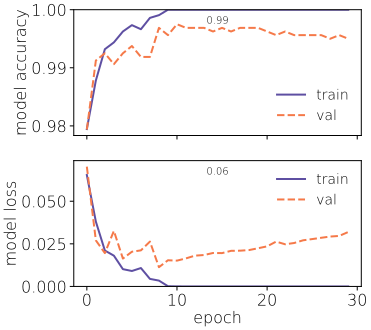

In [75]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model.evaluate(x_val, y_val_hot, verbose=0);

# accuracy
ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'val'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[0].transAxes)
ax[0].set_ylim(top=1)

# loss
ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center',verticalalignment='top', 
                         transform=ax[1].transAxes)
ax[1].legend(['train', 'val'], loc='best');

## Part d

In [76]:
predictions_prob_train=model(x_train)
predictions_prob_test=model(x_test)

predictions_train = np.argmax(predictions_prob_train, axis=1)
predictions_test = np.argmax(predictions_prob_test, axis=1)

mistakes_train = np.where(predictions_train != y_train)[0]
mistakes_test = np.where(predictions_test != y_test)[0]

num_mistakes_train, num_mistakes_test = len(mistakes_train), len(mistakes_test)

print(f'Train mistakes: {100*num_mistakes_train/x_train.shape[0]:.2f}%')
print(f'Test mistakes: {100*num_mistakes_test/x_test.shape[0]:.2f}%')

Train mistakes: 0.00%
Test mistakes: 0.50%


## Part e

In [78]:
predictions_prob_x = model(x)
predictions_x = np.argmax(predictions_prob_x, axis=1)

In [79]:
T, T_idx, T_counts = np.unique(Tval, return_index=True, return_counts=True)
T_idx = T_idx[::-1]
T_counts = T_counts[::-1]

ave_accuracy = -3 * np.ones_like(T)
ave_output = np.zeros([T.shape[0], 2])

for i in range(0, T_idx.shape[0]-1):
    idx = np.s_[T_idx[i]:T_idx[i+1]]
    ave_accuracy[i] = np.sum(predictions_x[idx] == y[idx])/T_counts[i]
    
    ave_output[i, 0] = np.average(predictions_prob_x[idx, 0])
    ave_output[i, 1] = np.average(predictions_prob_x[idx, 1])
    
idx = np.s_[T_idx[-1]:x.shape[0]-1]
ave_accuracy[-1] = np.sum(predictions_x[idx] == y[idx])/T_counts[i]
ave_output[-1, 0] = np.average(predictions_prob_x[idx, 0])
ave_output[-1, 1] = np.average(predictions_prob_x[idx, 1])

In [80]:
def magnetization_exact_(T):
    Tc = 2.0 / np.log(1 + np.sqrt(2.0))
    if (T < Tc):
        return (1.0 - np.sinh(2.0/T)**(-4))**(1.0/8.0)
    else:
        return 0.0

magnetization_exact = np.vectorize(magnetization_exact_)

Text(0.5, 0, 'Temperature(T/J)')

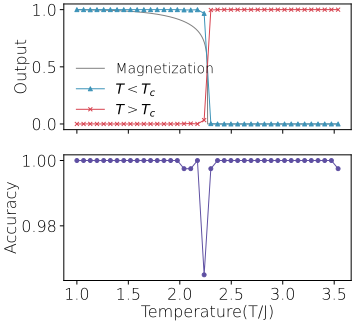

In [89]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5,5))

lT = np.linspace(T[0], T[-1], 1000)
ax[0].plot(lT, magnetization_exact(lT), '-', linewidth=1, label='Magnetization', color='grey')

ax[0].plot(T, ave_output[:,1], marker='^', label=r'$T < T_c$', color = colors[1], markersize=4, linewidth=1)
ax[0].plot(T, ave_output[:,0], marker='x', label=r'$T > T_c$', color = colors[-2], markersize=4, linewidth=1)
ax[0].set_ylabel('Output')
ax[0].legend()

ax[1].plot(T, ave_accuracy, marker='o', color = colors[0], markersize=4, linewidth=1)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Temperature(T/J)')